## درس اول 



In [ ]:
import tensorflow

In [ ]:
import keras

In [ ]:
print(tensorflow.__version__)
print(keras.__version__)

2.8.0
2.8.0


## List of hardware used in the tensorflow library



In [ ]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17735423017299975722
xla_global_id: -1
]


##The main four steps used for using the Keras library
## 1-Data preparation (Train/Valadation/Test)
## 2-Creating layers and model
## 3-Setting Training parameters (loss & optimization funcation , ...)
## 4-Train the Model (using fit())
## 5-Evaluation

### Number1: 1-Data preparation (Train/Valadation/Test)




## How to use the dataset in the Keras library
---



---




In [ ]:
## دیتاست مربوط به دست نویس
from keras.datasets import mnist
(train_images,train_labels) ,(test_images,test_labels)= mnist.load_data()
print("tarin:",train_images.shape,"test_images:",test_images.shape)

11501568/11490434 [==============================] - 0s 0us/step
tarin: (60000, 28, 28) test_images: (10000, 28, 28)


## اگر بخواهیم دسترسی محلی داشته باشیم ابتدا دیتاست را در درایو اپلود کرده و با 

*   List item
*   List item

دستورات زیر فراخاونی می کنیم

In [ ]:
from google.colab import drive
drive.mount('/content/drive')     

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
data=np.load('/content/drive/My Drive/Colab Notebooks/Keras/mnist.npz')

In [ ]:
train_images=data['x_train']
train_labels=np.array(data['y_train'])
test_images=data['x_test']
test_labels=np.array(data['y_test'])
print("tarin:",train_images.shape,"test_images:",test_images.shape)

tarin: (60000, 28, 28) test_images: (10000, 28, 28)


## Three important parameters in tensorflow : 
## 1- dimention   2-shape    3- type

In [ ]:
print('traindim:',train_images.ndim)
print('trainshape:',train_images.shape)
print('traintype:',train_images.dtype)

traindim: 3
trainshape: (60000, 28, 28)
traintype: uint8


In [ ]:
print('testdim:',test_images.ndim)
print('testshape:',test_images.shape)
print('testtype:',test_images.dtype)

testdim: 3
testshape: (10000, 28, 28)
testtype: uint8


## Showing one of sample the use matplotlib library


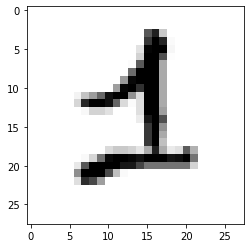

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[24]
plt.imshow(digit , cmap= 'binary')
#plt.imshow(digit)
#plt.imshow(digit , cmap= 'gray')

In [ ]:
my_data= train_images[10:100]
my_data.shape

(90, 28, 28)

In [ ]:
my_data1= my_data[1]
my_data1.shape

(28, 28)

(15, 28, 28)
(15, 28, 28)
(15, 28, 28)


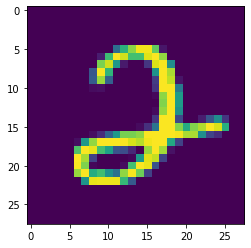

In [ ]:
print(my_data[5:20,:,:].shape)
print(my_data[5:20,:,:].shape)
print(my_data[5:20,0:28,0:28].shape)
plt.imshow(my_data[5:20,:,:][1])

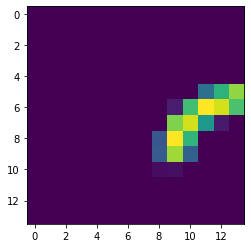

In [ ]:
#نشان دادن قسمتی دلخواه از تصویر
c=my_data[5:20,10:20,0:28]
plt.imshow(c[1])
# مربع بالا سمت چپ را نشان بدهد
c=my_data[5:20,:14,:14]
plt.imshow(c[1])

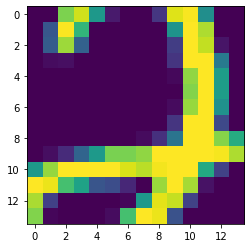

In [ ]:
# مربع مرکز را نشان بدهد
c=my_data[5:20,7:-7,7:-7]
plt.imshow(c[1])

# دقت گردد در انتخاب داده ها از ترین می بایست به همان نسبت از داده های لیبل انتخاب کردد 

In [ ]:
my_data= train_images[10:100]
my_label= train_labels[10:100]
print("my_data:",my_data.shape,'my_label:',my_label.shape)

my_data: (90, 28, 28) my_label: (90,)


 ## در بسیاری از اوقات داده را به صورت کلی وارد مدل نمی کنند بلکه به صورت بخش بخش یا بج بچ وارد می کنند


In [ ]:
batch1=my_data[:128]
batch2=my_data[128:256]
n=10
batch_n=my_data[128*n:128*(n+1)]# که می توان با ایجاد یک حلقه فور بچ ها را تولید کرد
# لیکن در کتابخانه کراس کافی است سایز بچ ها را بدهیم

## 2-Loading Data and normalize





## Load an image database


In [ ]:
import glob
import cv2
print(cv2.__version__)
import numpy as np
from google.colab import drive
drive.mount('/content/drive')     

4.1.2
Mounted at /content/drive


In [ ]:
# انخاب تصاویر از یک مجموعه در یک مسیر تعریف شده با پسوند خاص برای زمانی که پسوندهای متفاوت داریم
images_path='/content/drive/My Drive/Colab Notebooks/Keras/CamVid/train/'
images=glob.glob(images_path+'*.png')+glob.glob(images_path+'*.jpg')

In [ ]:
print(len(images))#test Performance
images.sort()

367


# loading train images

In [ ]:
X=[]
width=200
height=100
for img in images:
   image = cv2.imread(img)
   #برای یک شکل کردن داده ها یا به عبارتی نرمالیزه کردن از تکنیک های زیر استفاده می کنیم
   image = cv2.resize(image,(width,height))#  برای یکسان نمودن سایز تصلاویر باید تعاریف زیر انجام گردد برای طول و عرض تا مدل بتواند درست آموزش ببیند
   #image = image /255 # مرسوم این است که مقادیر پیکسل تصاویر را بین 0 و 1 کنیم لدا اگر 255 بیشترین مقدار پیکسل هست همه را تقسیم بر 255 بکنیم و اگر بیشترین مقدار پیکسل را نمی دانیم ازکتابخانه نامپای استفاده می کنتیم
   image = image / np.max(image)
   image = image.astype(np.float32)# می خواهیم تایپ های تصاویر را هم مانند هم کنیم مثلا اگر بعضی انوع اینتجر و یا فلوت باشند همه را فلوت می کنیم
   X.append(image)


In [ ]:
#test Performance
print(img)# مسیر آخرین تصویر باید باشد
print(image.shape, image.dtype)# باید شامل یک تصویر با ساییز 100*200 با تایپ فلوت باشد عدد 3 هم نشان دهنده کانال های می باشد و چون رنگی است 3 می باشد
print(len(X))#  بایدبه همان اندازه 367 باشد

/content/drive/My Drive/Colab Notebooks/Keras/CamVid/train/0016E5_08640.png
(100, 200, 3) float32
367


# loading lable images

In [ ]:
# انخاب تصاویر از یک مجموعه در یک مسیر تعریف شده با پسوند خاص برای زمانی که پسوندهای متفاوت داریم
lables_path='/content/drive/My Drive/Colab Notebooks/Keras/CamVid/trainannot/'
lables=glob.glob(lables_path+'*.png')+glob.glob(lables_path+'*.jpg')

In [ ]:
print(len(lables))#test Performance
lables.sort()

367


In [ ]:
Y=[]
Out_width=200
#سایز ما باید سایز خروجی مدل ما باشد اگر مدل ما طوزی باشد که خروجیش همان سایز ورودیش باشد ما می توانیم سایز لیبل ها را همین سایز بگذاریم ولی ولی اکثر اوقات وقتی یک تصویر وارد یک مدل می شود
# توی خروجی سایزش تغییر کرده ما توی اون خروجی می خواهیم مقایسه کنیم با سایز لیبل ها به خاطر همین سایز لیبل ها باید برابر باشد با سایز خروجی مدل ما 
Out_height=100
nClasses=12 # متغییر برای تعداد کلاس ها جهت جایگزینی با بعد سوم همان ار جی بی 
seg_lables=np.zeros([Out_height,Out_width,nClasses],dtype='uint8') # دقت گردد جای طول و عرق در زروز برعکس باید وارد گردد
for mask in lables:
   lable = cv2.imread(mask)
   #برای یک شکل کردن داده ها یا به عبارتی نرمالیزه کردن از تکنیک های زیر استفاده می کنیم
   lable = cv2.resize(lable,(Out_width,Out_height))#  برای یکسان نمودن سایز تصلاویر باید تعاریف زیر انجام گردد برای طول و عرض تا مدل بتواند درست آموزش ببیند
   #lable = lable / np.max(lable) دیگر نیاری به نرمالیزه کردن ایمیج در لیبل نداریم 
   lable=lable[:,:,0] # ما در لیبل تنها به دو بعد نیار داریم که همه کلاس ها را شامل می شود و دیگر نیاز به بعد کانل ار جی بی  همان بعد سوم نمی باشد پس صفر می گداریم 
   for c in range(nClasses):
     seg_lables[:,:,c] = (lable == c)
   lable = lable.astype(np.uint8)#   دقت شود تایپ لیبل دیگر فلوت نیست بلکه عددی بین 0 تا 12 باتوجه به 12 کلاس می باشد  و اینتجر می باشد و چون علامت دار نیستند از ان ساین استفاده می شود 
   Y.append(lable)


In [ ]:
print(seg_lables.shape)
lable.shape

(100, 200, 12)


(100, 200)